# **AN√ÅLISIS DE FACTORES QUE INFLUYEN EN LA CAPACIDAD COGNITIVA**

## Hip√≥tesis 1:
Fuente: https://revistamedica.com/efectos-consumo-moderado-cafe-salud-cognitiva/
Los estudios realizados han mostrado que el consumo moderado de caf√© est√° asociado con un menor riesgo de deterioro cognitivo, osteoporosis, diabetes y enfermedades neurodegenerativas como el Alzheimer y el Parkinson. La cafe√≠na, como principal compuesto activo del caf√©, parece tener un efecto protector sobre la memoria y la atenci√≥n.
El consumo de caf√© podr√≠a estar relacionado con la salud, por ejemplo, la p√©rdida de demencia es menor en personas que han tenido una ingesta moderada y regular. Tambi√©n se ha desprendido del estudio que un exceso en la ingesta de esta bebida tiene consecuencias negativas para la salud. El caf√© en una medida razonable tiene efectos antioxidantes e inflamatorios para ayudar a proteger nuestro cerebro.
Fuente 2: https://www.sabervivirtv.com/nutricion/cuanta-cafeina-tiene-un-cafe-depende-de-como-lo-prepares_11344
"Las ingestas de cafe√≠na de hasta 400 mg al d√≠a [‚Ä¶] no tienen efectos perjudiciales para la salud de los adultos en la poblaci√≥n general, excepto en el caso de las embarazadas". Para estas √∫ltimas, el tope est√° en 200 mg diarios. Una taza de cafetera italiana contiene entorno a 70 miligramos de cafe√≠na.

In [62]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaci√≥n
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuraci√≥n
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gesti√≥n de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [63]:
df_analisis= pd.read_csv("df_test.csv")
df_analisis.sample(4)

user_id  age  gender  sleep_duration  stress_level       diet_type  \
44474    44475   19    Male             5.7             4      Vegetarian   
9562      9563   20  Female             4.1            10  Non-Vegetarian   
32107    32108   56  Female             5.3             4  Non-Vegetarian   
6744      6745   41  Female             8.7             5      Vegetarian   

       daily_screen_time exercise_frequency  caffeine_intake  reaction_time  \
44474                2.7             Medium              499         444.93   
9562                 3.6             Medium              249         586.49   
32107                2.3             Medium              427         563.10   
6744                 9.5               High              118         330.53   

       memory_test_score  cognitive_score  ai_predicted_score  
44474                 74            57.22               61.56  
9562                  67            18.57               19.08  
32107                 58            30.76               33.42  
6744                  75            83.20               88.16

In [64]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             80000 non-null  int64  
 1   age                 80000 non-null  int64  
 2   gender              80000 non-null  object 
 3   sleep_duration      80000 non-null  float64
 4   stress_level        80000 non-null  int64  
 5   diet_type           80000 non-null  object 
 6   daily_screen_time   80000 non-null  float64
 7   exercise_frequency  80000 non-null  object 
 8   caffeine_intake     80000 non-null  int64  
 9   reaction_time       80000 non-null  float64
 10  memory_test_score   80000 non-null  int64  
 11  cognitive_score     80000 non-null  float64
 12  ai_predicted_score  80000 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 7.9+ MB


In [65]:
df_analisis.columns

Index(['user_id', 'age', 'gender', 'sleep_duration', 'stress_level',
       'diet_type', 'daily_screen_time', 'exercise_frequency',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score'],
      dtype='object')

In [66]:
def obtener_conteo_valores_unicos(df_analisis):
    conteo_unicos = {}
    for columna in df_analisis.columns:
        conteo_unicos[columna] = df_analisis[columna].value_counts()
    return conteo_unicos

diccionario_conteo = obtener_conteo_valores_unicos(df_analisis)

print("\nConteo de valores √∫nicos por columna:")
for columna, conteo in diccionario_conteo.items():
    print(f"\n'{columna}':\n{conteo}")


Conteo de valores √∫nicos por columna:

'user_id':
user_id
1        1
53331    1
53338    1
53337    1
53336    1
        ..
26667    1
26666    1
26665    1
26664    1
80000    1
Name: count, Length: 80000, dtype: int64

'age':
age
40    1979
50    1972
32    1963
29    1961
49    1959
44    1956
37    1955
43    1944
18    1941
33    1938
28    1928
19    1925
54    1924
58    1921
34    1921
55    1920
47    1920
48    1918
35    1915
56    1915
27    1914
22    1909
39    1909
51    1902
25    1901
30    1893
46    1888
53    1887
57    1887
31    1878
38    1877
24    1875
42    1872
59    1868
41    1859
21    1858
36    1853
20    1848
52    1848
26    1847
23    1829
45    1823
Name: count, dtype: int64

'gender':
gender
Female    38404
Male      38322
Other      3274
Name: count, dtype: int64

'sleep_duration':
sleep_duration
9.9     1410
4.4     1408
6.8     1407
7.9     1407
5.4     1394
        ... 
4.8     1263
4.9     1259
5.6     1246
4.0      678
10.0     669
Name: cou

Pasos para el An√°lisis:

- Visualizaciones: 
    La clave ahora es crear visualizaciones para entender mejor las distribuciones de cada variable y las relaciones entre ellas. 

    Algunas visualizaciones √∫tiles podr√≠an ser:

    **Histogramas y gr√°ficos de densidad**: Para variables num√©ricas (*age, sleep_duration, stress_level, daily_screen_time, caffeine_intake, reaction_time, memory_test_score, cognitive_score, ai_predicted_score*) para ver sus distribuciones.

    **Gr√°ficos de barras**: Para variables categ√≥ricas (g*ender, diet_type, exercise_frequency*) para ver las proporciones de cada categor√≠a.

    **Boxplots**: Para comparar la distribuci√≥n de una variable num√©rica entre diferentes categor√≠as de una variable categ√≥rica (*ej., sleep_duration por gender*).

    **Scatter plots**: Para visualizar la relaci√≥n entre dos variables num√©ricas (*ej., sleep_duration vs. cognitive_score*).

    **Heatmap de correlaci√≥n**: Para ver las correlaciones entre todas las variables num√©ricas.

    **Estad√≠sticas Descriptivas**: Calcular medidas como la media, mediana, desviaci√≥n est√°ndar, cuartiles para las variables num√©ricas para cuantificar sus caracter√≠sticas centrales y dispersi√≥n. *(.describe())*

    **An√°lisis Bivariado y Multivariado**: Investigar las relaciones entre pares y grupos de variables. 
    Por ejemplo, *¬øc√≥mo se relaciona la edad con la duraci√≥n del sue√±o y el rendimiento de la memoria?* 
    *¬øHay diferencias en el rendimiento cognitivo entre diferentes tipos de dieta y niveles de ejercicio?*

In [67]:
''' Identificador de usuario ("user_id") , 
Edad ("age"), 
G√©nero ("gender), 
Duraci√≥n del sue√±o ("sleep_duration"), 
Nivel de estr√©s("stress_level"), 
Tipo de dieta ("diet_type"), 
Tiempo diario de pantalla ("daily_screen_time"), 
Frecuencia de ejercicio ("exercise_frequency"), 
Consumo de cafe√≠na ("caffeine_intake"), 
Tiempo de reacci√≥n ("reaction_time"), 
Puntuaci√≥n de la prueba de memoria ("memory_test_score"), 
Puntuaci√≥n cognitiva ("cognitive_score"), 
Puntuaci√≥n predicha por IA ("ai_predicted_score")'''

' Identificador de usuario ("user_id") , \nEdad ("age"), \nG√©nero ("gender), \nDuraci√≥n del sue√±o ("sleep_duration"), \nNivel de estr√©s("stress_level"), \nTipo de dieta ("diet_type"), \nTiempo diario de pantalla ("daily_screen_time"), \nFrecuencia de ejercicio ("exercise_frequency"), \nConsumo de cafe√≠na ("caffeine_intake"), \nTiempo de reacci√≥n ("reaction_time"), \nPuntuaci√≥n de la prueba de memoria ("memory_test_score"), \nPuntuaci√≥n cognitiva ("cognitive_score"), \nPuntuaci√≥n predicha por IA ("ai_predicted_score")'

Las preguntas que vamos a responder en funci√≥n de que las estad√≠sticas nos den resultados a destacar son:
1. ¬øCu√°l es la relaci√≥n de edad y duraci√≥n del sue√±o?
2. Ver correlaciones num√©ricas en Heatmap
3. ¬øRelaci√≥n puntuaci√≥n pruebas y nivel de ingesta de cafe√≠na?
4. ¬øRelaci√≥n dieta con puntuaciones?
5. ¬øRelaci√≥n ingesta de cafe√≠na con horas de sue√±o?
6. ...

**Es importante clasificar las puntuaciones de los tests para una mejor interpretaci√≥n de los resultados**

In [68]:
df_analisis["age"].unique()

array([57, 39, 26, 32, 50, 36, 48, 35, 29, 54, 18, 51, 24, 19, 21, 37, 20,
       33, 23, 22, 46, 44, 58, 43, 45, 49, 42, 47, 38, 27, 41, 31, 56, 30,
       55, 53, 34, 25, 59, 52, 28, 40], dtype=int64)

In [69]:
df_analisis.head()

user_id  age  gender  sleep_duration  stress_level       diet_type  \
0        1   57  Female             6.5             3  Non-Vegetarian   
1        2   39  Female             7.6             9  Non-Vegetarian   
2        3   26    Male             8.2             6      Vegetarian   
3        4   32    Male             7.8             9      Vegetarian   
4        5   50    Male             9.7             2  Non-Vegetarian   

   daily_screen_time exercise_frequency  caffeine_intake  reaction_time  \
0                6.5             Medium               41         583.33   
1               10.8               High              214         368.24   
2                5.7                Low              429         445.21   
3                8.3                Low              464         286.33   
4               11.3             Medium              365         237.65   

   memory_test_score  cognitive_score  ai_predicted_score  
0                 65            36.71               39.77  
1                 58            54.35               57.68  
2                 49            32.57               29.54  
3                 94            70.15               74.59  
4                 62            87.54               91.78

## Lineplot relacionando la edad y las horas de sue√±o promedio por persona al d√≠a

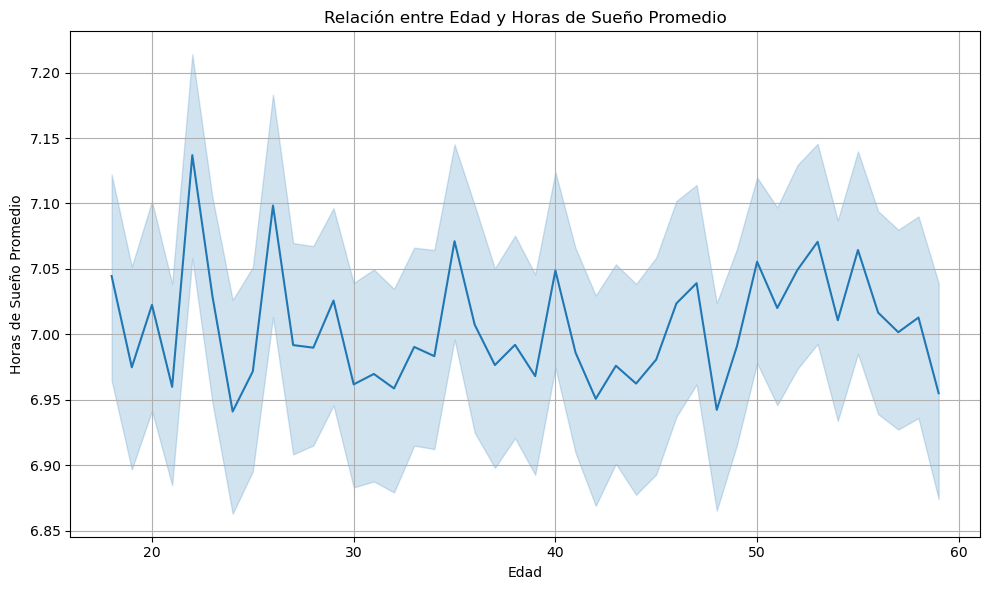

In [70]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='sleep_duration', data=df_analisis)
plt.title('Relaci√≥n entre Edad y Horas de Sue√±o Promedio')
plt.xlabel('Edad')
plt.ylabel('Horas de Sue√±o Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
lista = df_analisis.columns, 

*age*

> ¬øC√≥mo se distribuyen las edades de los individuos en el conjunto de datos?
 
> ¬øHay alg√∫n grupo de edad predominante?

Histograma de la variable "age": Esta gr√°fica mostrar√≠a la distribuci√≥n de las edades de los individuos en el DataFrame, lo que nos permitir√≠a obtener informaci√≥n sobre la dispersi√≥n y la forma de la distribuci√≥n.

<Axes: xlabel='age', ylabel='Count'>

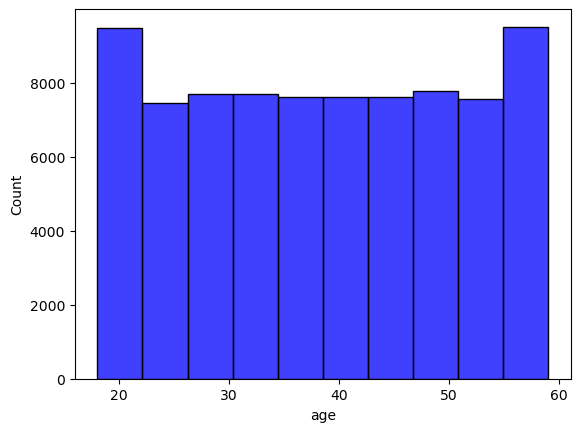

In [72]:
sns.histplot(df_analisis, x="age", bins=10, kde=False, color="blue")

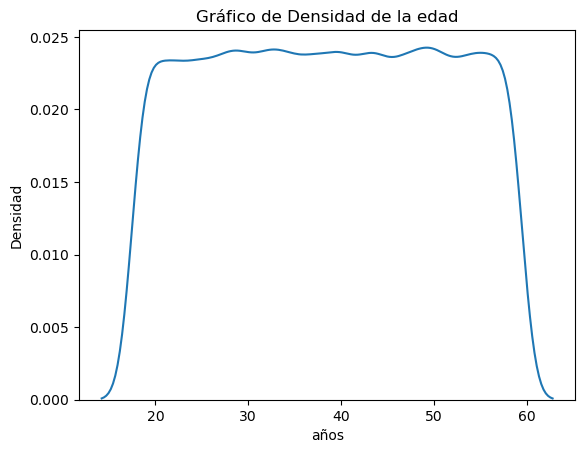

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo con seaborn
sns.kdeplot(df_analisis['age'])
plt.title('Gr√°fico de Densidad de la edad')
plt.xlabel('a√±os')
plt.ylabel('Densidad')
plt.show()

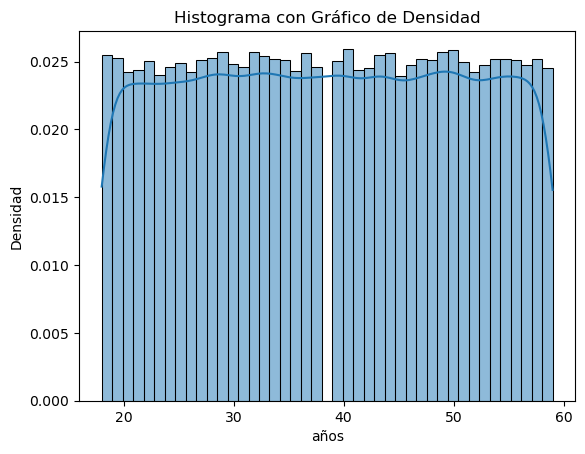

In [74]:
# Tambi√©n puedes superponerlo con un histograma
sns.histplot(df_analisis['age'], kde=True, stat="density")
plt.title('Histograma con Gr√°fico de Densidad')
plt.xlabel('a√±os')
plt.ylabel('Densidad')
plt.show()

## Dividir edad por rangos:
Vamos a dividir la variable 'age' en rangos que representen diferentes generaciones. Esta es una propuesta de rangos generacionales comunes:

- Generaci√≥n Z (Gen Z): 13 - 28 a√±os (aproximadamente nacidos entre 1997 y 2007)
- Millennials (Generaci√≥n Y): 29 - 44 a√±os (aproximadamente nacidos entre 1981 y 1996)
- Generaci√≥n X: 45 - 60 a√±os (aproximadamente nacidos entre 1965 y 1980)
- Baby Boomers: 61 - 59 a√±os (en este rango espec√≠fico, aunque t√≠picamente son mayores)

In [75]:
def clasificar_generacion(edad):
    """Clasifica la edad en grupos generacionales."""
    if 13 <= edad <= 28:
        return 'Gen Z'
    elif 29 <= edad <= 44:
        return 'Millennials'
    elif 45 <= edad <= 60:
        return 'Generaci√≥n X'
    return None  # Para edades fuera de estos rangos (si las hubiera)
        

### A√±adimos la columna de niveles categ√≥ricos

In [76]:
df_analisis['generation'] = df_analisis['age'].apply(clasificar_generacion)

In [77]:
# ¬øCuantos usuarios hay en cada generaci√≥n?
df_analisis['generation'].value_counts()

generation
Millennials     30673
Generaci√≥n X    28552
Gen Z           20775
Name: count, dtype: int64

### Visualizaci√≥n por generaci√≥n

**Gr√°fico de quesitos**

Text(0, 0.5, 'Frecuencia')

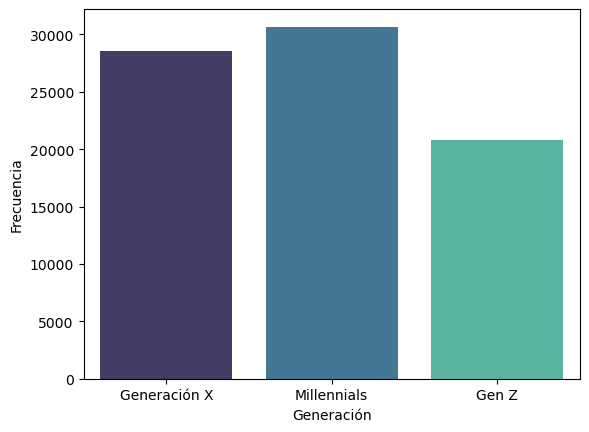

In [78]:
sns.countplot(x = "generation", 
              data = df_analisis, 
              palette = "mako", 
              color = "b")
plt.xlabel("Generaci√≥n")
plt.ylabel("Frecuencia")

### *Analizar c√≥mo las generaciones difieren en otras variables:*

**Agrupamos por 'generacion' y calculamos estad√≠sticas descriptivas (media, mediana, etc.) para otras columnas como 'sleep_duration', 'stress_level', 'memory_test_score', etc.*

In [79]:
print(df_analisis.groupby('generation')['sleep_duration'].mean())
print(df_analisis.groupby('generation')['memory_test_score'].mean())
print(df_analisis.groupby('generation')['stress_level'].mean())

generation
Gen Z           7.014522
Generaci√≥n X    7.015712
Millennials     6.989447
Name: sleep_duration, dtype: float64
generation
Gen Z           69.516390
Generaci√≥n X    69.451667
Millennials     69.529586
Name: memory_test_score, dtype: float64
generation
Gen Z           5.494248
Generaci√≥n X    5.501366
Millennials     5.486356
Name: stress_level, dtype: float64


*sleep_duration* *x* *generation*

## Lineplot para variables edad y horas de sue√±o

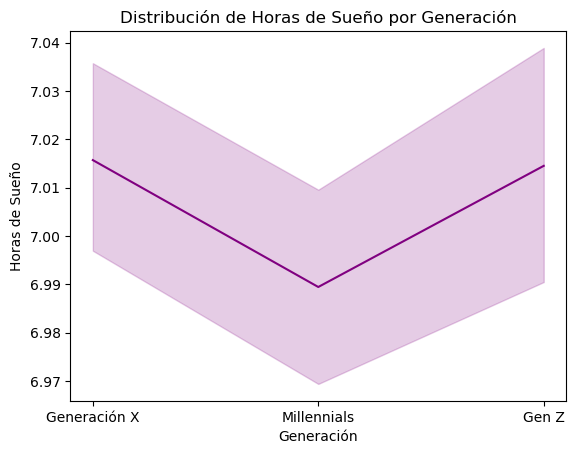

In [80]:
sns.lineplot(x='generation', y='sleep_duration', data=df_analisis, color = "purple")
plt.title('Distribuci√≥n de Horas de Sue√±o por Generaci√≥n')
plt.xlabel('Generaci√≥n')
plt.ylabel('Horas de Sue√±o')
plt.show()

## *Por generaci√≥n lo vemos m√°s claro*

*gender*

> ¬øQu√© ocurre con la variable 'Other'?

> ¬øInfluir√° el g√©nero en la capacidad cognitiva o el nivel de estr√©s?

## Gr√°fico de barras para ver relaci√≥n de g√©neros 

Text(0, 0.5, 'Frecuencia')

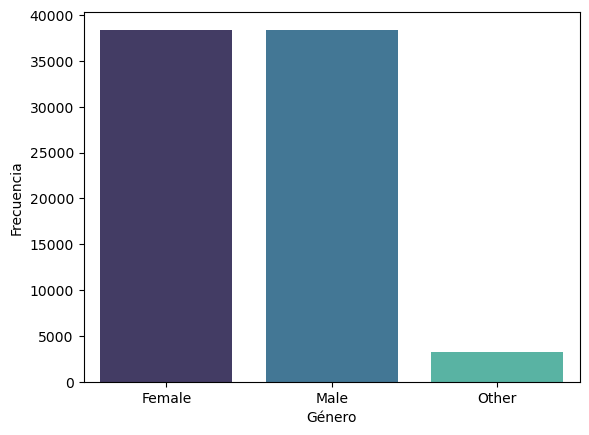

In [81]:
sns.countplot(x = "gender", 
              data = df_analisis, 
              palette = "mako", 
              color = "b")
plt.xlabel("G√©nero")
plt.ylabel("Frecuencia")

*sleep_duration*

> ¬øCu√°l es la distribuci√≥n general de la duraci√≥n del sue√±o?

> ¬øHay valores at√≠picos (duraciones de sue√±o muy cortas o muy largas)?

## Gr√°fico de cajas o boxplot para ver valores at√≠picos

Text(0.5, 0, 'Horas de sue√±o')

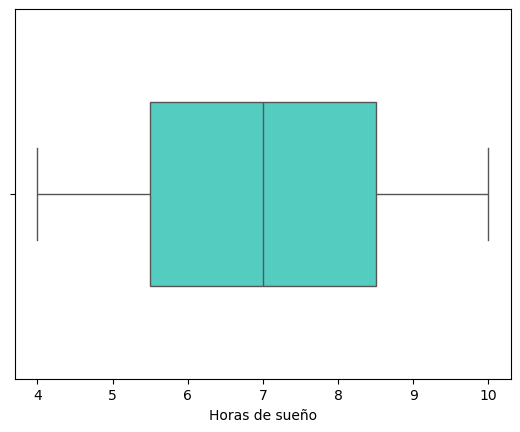

In [82]:
sns.boxplot(x = "sleep_duration", 
            data = df_analisis, 
            width = 0.5, 
            color = "turquoise")
plt.xlabel("Horas de sue√±o")

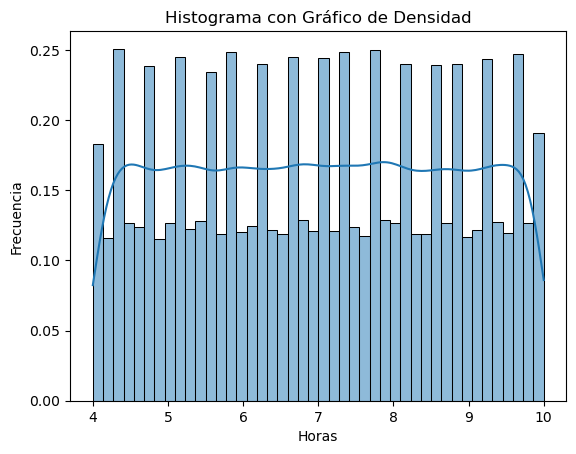

In [83]:
# Tambi√©n puedes superponerlo con un histograma
sns.histplot(df_analisis['sleep_duration'], kde=True, stat="density")
plt.title('Histograma con Gr√°fico de Densidad')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')
plt.show()

*diet_type*

## Gr√°fico de barras para ver relaci√≥n de dietas

Text(0, 0.5, 'Frecuencia')

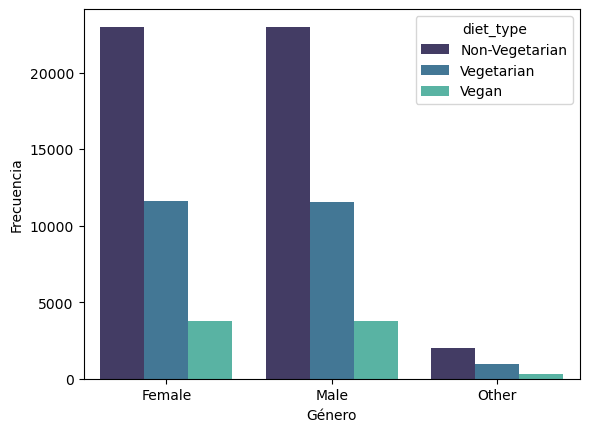

In [84]:
sns.countplot(x = "gender", 
              data = df_analisis, 
              palette = "mako", 
              color = "b",
              hue = "diet_type")
plt.xlabel("G√©nero")
plt.ylabel("Frecuencia")

*stress_level*

## Dividir nivel de estr√©s por rangos:
Vamos a dividir la variable 'stress_level' en rangos que representen diferentes niveles:
- Bajo: 1 - 3
- Medio: 4 - 7
- Alto: 8 - 10

In [85]:
def clasificar_stress(nivel):
    """Clasifica el nivel de estr√©s en categor√≠as."""
    if 1 <= nivel <= 3:
        return 'Low'
    elif 4 <= nivel <= 7:
        return 'Medium'
    elif 8 <= nivel <= 10:
        return 'High'
    return None  # Para valores fuera del rango esperado (si los hubiera)


### A√±adimos la columna de niveles categ√≥ricos en la variable de nivel de estr√©s

In [86]:
df_analisis['stress_category'] = df_analisis['stress_level'].apply(clasificar_stress)

In [87]:
df_analisis.sample()

user_id  age gender  sleep_duration  stress_level       diet_type  \
9539     9540   36   Male             8.3             4  Non-Vegetarian   

      daily_screen_time exercise_frequency  caffeine_intake  reaction_time  \
9539                6.8               High              291          281.0   

      memory_test_score  cognitive_score  ai_predicted_score   generation  \
9539                 64            87.75               91.17  Millennials   

     stress_category  
9539          Medium

*caffeine_intake*

In [88]:
'''Seg√∫n indica la Administraci√≥n de Alimentos y Medicamentos (FDA) estadounidense 
y como cita el portal de divulgaci√≥n sobre salud Healthline, las dosis de hasta 400mg al d√≠a 
(entre dos y tres tazas de caf√©) son seguras para la mayor√≠a de las personas. '''

'Seg√∫n indica la Administraci√≥n de Alimentos y Medicamentos (FDA) estadounidense \ny como cita el portal de divulgaci√≥n sobre salud Healthline, las dosis de hasta 400mg al d√≠a \n(entre dos y tres tazas de caf√©) son seguras para la mayor√≠a de las personas. '

## Dividir los miligramos de cafe√≠na por niveles para una mejor comprensi√≥n de los datos.

Nos basamos en la informaci√≥n de varias b√∫squedas en l√≠nea en webs de alta fiabilidad para proponer una clasificaci√≥n por rangos de ingesta diaria de cafe√≠na (en mg):

- Sin Cafe√≠na / Muy Bajo: 0 - 10 mg (T√≠picamente encontrado en descafeinado o cantidades traza en algunos alimentos).
- Bajo: 11 - 80 mg (Aproximadamente el contenido de una taza de t√© o una porci√≥n peque√±a de chocolate).
- Moderado: 81 - 200 mg (Aproximadamente el contenido de 1-2 tazas de caf√© est√°ndar).
- Medio-Alto: 201 - 300 mg (Aproximadamente el contenido de 2-3 tazas de caf√© fuerte o algunas bebidas energ√©ticas).
- Alto: 301 - 400 mg (La mayor√≠a de las fuentes consideran que hasta 400 mg al d√≠a es seguro para adultos sanos).
- Muy Alto: 401 - 499 mg (Supera las recomendaciones diarias para muchas personas y podr√≠a aumentar el riesgo de efectos secundarios).

In [89]:
def clasificar_cafeina(ingesta_mg):
    """Clasifica la ingesta de cafe√≠na en rangos (mg)."""
    if 0 <= ingesta_mg <= 10:
        return 'Almost nothing'
    elif 11 <= ingesta_mg <= 80:
        return 'Low'
    elif 81 <= ingesta_mg <= 200:
        return 'Moderate'
    elif 201 <= ingesta_mg <= 300:
        return 'Medium-High'
    elif 301 <= ingesta_mg <= 400:
        return 'High'
    elif 401 <= ingesta_mg <= 499:
        return 'Too much'
    return None  # Para valores fuera del rango esperado (si los hubiera)

### A√±adimos la columna de niveles categ√≥ricos en la variable de cantidad de cafe√≠na tomada al d√≠a

In [90]:
df_analisis['caffeine_category'] = df_analisis['caffeine_intake'].apply(clasificar_cafeina)

## Decidimos dividir  las variables "cognitive_score", "ai_predicted_score", memory_test_score" y "reaction_time" en grupos para:

- Comparar f√°cilmente entre rangos (por ejemplo, bajo, medio, alto)

- Crear visualizaciones m√°s limpias y comprensibles en Tableau

- Aplicar filtros, colores o agrupaciones sin depender de n√∫meros exactos

*reaction time*

 La variable Reaction_Time est√° medida en milisegundos (ms), no en segundos. Es decir:

        - 200.00 ms = 0.2 segundos
        - 599.99 ms = 0.6 segundos

    Tiempo de reacci√≥n (segundos, m√≠nimo 0.3 aprox., m√°ximo 1.5 aprox.):

        - Muy r√°pido: 200 - 299 ms (0.200 ‚Äì 0.299 segundos)
        - R√°pido: 300 - 399 ms (0.300 ‚Äì 0.399 segundos)
        - Promedio: 400 - 499 ms (0.400 ‚Äì 0.499 segundos)
        - Lento: 500 - 599,99 ms (0.500 ‚Äì 0.599 segundos)

In [91]:
def clasificar_reactiontime(ms):
    """Clasifica la velocidad de reacci√≥n por milisegundos (ms)"""
    if 200 <= ms <= 299:
        return 'Top fast'
    elif 300 <= ms <= 399:
        return 'Fast'
    elif 400 <= ms <= 499:
        return 'Normal'
    elif 500 <= ms <= 599.99:
        return 'Slow'
    return None  

In [92]:
df_analisis['reaction_time_category'] = df_analisis['reaction_time'].apply(clasificar_reactiontime)

*memory test score*

Los puntajes de la prueba de memoria parecen ser valores enteros dentro de un rango (viendo los valores m√°s frecuentes).
    Memory_Test_Score (40 a 99 aprox.)
    
    Puntuaci√≥n del test:
        - Baja: 40 ‚Äì 59
        - Media: 60 ‚Äì 79
        - Alta: 80 ‚Äì 99

In [93]:
def clasificar_memorytest(score):
    """Clasifica la puntuaci√≥n del test de memoria"""
    if 40 <= score <= 59:
        return 'Low' #Rendimiento de memoria bajo
    elif 60 <= score <= 79:
        return 'Medium' #Rendimiento promedio
    elif 80 <= score <= 99:
        return 'High' #Rendimiento de memoria alto
    return None  

In [94]:
df_analisis['memory_score_category'] = df_analisis['memory_test_score'].apply(clasificar_memorytest)

*cognitive score*

Las puntuaciones cognitivas son valores continuos con decimales, lo que sugiere una m√©trica m√°s compleja.
    Clasificaci√≥n de Cognitive_Score (0 a 100)
    
        - 0 ‚Äì 39 ‚Üí Bajo: Rendimiento cognitivo bajo
        - 40 ‚Äì 59 ‚Üí Medio-bajo: Por debajo del promedio
        - 60 ‚Äì 79 ‚Üí Medio-alto: Por encima del promedio
        - 80 ‚Äì 100 ‚Üí Alto: Excelente rendimiento cognitivo

In [95]:
def clasificar_cognitivescore(score):
    """Clasifica la puntuaci√≥n del test cognitivo"""
    if 0 <= score <= 39:
        return 'Low' #Rendimiento cognitivo bajo
    elif 40 <= score <= 59:
        return 'Medium' #Por debajo del promedio
    elif 60 <= score <= 79:
        return 'Medium-High' #Por encima del promedio
    elif 80 <= score <= 100:
        return 'High' #Excelente rendimiento cognitivo
    return None  

In [96]:
df_analisis['cognitive_category'] = df_analisis['cognitive_score'].apply(clasificar_cognitivescore)

*ai predicted score*

Similar a la puntuaci√≥n cognitiva, esta es una puntuaci√≥n predicha por IA con valores continuos.
    ü§ñ AI_Predicted_Score (0 a 100), de la misma manera:

          - Bajo: 0 ‚Äì 39
          - Medio-bajo: 40 ‚Äì 59
          - Medio-alto: 60 ‚Äì 79
          - Alto: 80 ‚Äì 100

In [97]:
def clasificar_aicognitivescore(score):
    """Clasifica la puntuaci√≥n del test cognitivo predicho por la IA (Inteligencia Artificial)"""
    if 0 <= score <= 39:
        return 'Low'
    elif 40 <= score <= 59:
        return 'Medium'
    elif 60 <= score <= 79:
        return 'Medium-High'
    elif 80 <= score <= 100:
        return 'High'
    return None  

In [98]:
df_analisis['ai_cognitive_category'] = df_analisis['ai_predicted_score'].apply(clasificar_aicognitivescore)

In [99]:
df_analisis.sample()

user_id  age gender  sleep_duration  stress_level       diet_type  \
45176    45177   22   Male             5.3             2  Non-Vegetarian   

       daily_screen_time exercise_frequency  caffeine_intake  reaction_time  \
45176                6.9                Low              396         401.72   

       memory_test_score  cognitive_score  ai_predicted_score generation  \
45176                 92            62.38               64.14      Gen Z   

      stress_category caffeine_category reaction_time_category  \
45176             Low              High                 Normal   

      memory_score_category cognitive_category ai_cognitive_category  
45176                  High        Medium-High           Medium-High

## Vamos a establecer medidas de correlaci√≥n
*En primer lugar definimos cu√°les son las variables num√©ricas*

In [100]:
numericas = df_analisis.select_dtypes(include=np.number).columns
numericas

Index(['user_id', 'age', 'sleep_duration', 'stress_level', 'daily_screen_time',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score'],
      dtype='object')

In [101]:
from itertools import combinations
# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('user_id', 'age'),
 ('user_id', 'sleep_duration'),
 ('user_id', 'stress_level'),
 ('user_id', 'daily_screen_time'),
 ('user_id', 'caffeine_intake'),
 ('user_id', 'reaction_time'),
 ('user_id', 'memory_test_score'),
 ('user_id', 'cognitive_score'),
 ('user_id', 'ai_predicted_score'),
 ('age', 'sleep_duration'),
 ('age', 'stress_level'),
 ('age', 'daily_screen_time'),
 ('age', 'caffeine_intake'),
 ('age', 'reaction_time'),
 ('age', 'memory_test_score'),
 ('age', 'cognitive_score'),
 ('age', 'ai_predicted_score'),
 ('sleep_duration', 'stress_level'),
 ('sleep_duration', 'daily_screen_time'),
 ('sleep_duration', 'caffeine_intake'),
 ('sleep_duration', 'reaction_time'),
 ('sleep_duration', 'memory_test_score'),
 ('sleep_duration', 'cognitive_score'),
 ('sleep_duration', 'ai_predicted_score'),
 ('stress_level', 'daily_screen_time'),
 ('stress_level', 'caffeine_intake'),
 ('stress_level', 'reaction_time'),
 ('stress_level', 'memory_test_score'),
 ('stress_level', 'cognitive_score'),
 ('stre

In [102]:
try: print(df_correlaciones = numericas.corr(method = "spearman"))
except: 'used_id'

In [103]:
# Calculate the correlation matrix for numerical columns
df_correlaciones = df_analisis[numericas].corr(method='spearman')

# Display the correlation matrix
df_correlaciones

user_id       age  sleep_duration  stress_level  \
user_id             1.000000 -0.007462        0.002873     -0.001903   
age                -0.007462  1.000000        0.000700     -0.000118   
sleep_duration      0.002873  0.000700        1.000000      0.004956   
stress_level       -0.001903 -0.000118        0.004956      1.000000   
daily_screen_time  -0.001098 -0.002450       -0.000394     -0.004841   
caffeine_intake    -0.004581 -0.004253       -0.002470      0.001038   
reaction_time      -0.003205  0.004665       -0.009678     -0.011374   
memory_test_score   0.003899 -0.002182       -0.001504      0.000854   
cognitive_score     0.005678 -0.005534        0.144261     -0.217181   
ai_predicted_score  0.004955 -0.006096        0.143616     -0.215838   

                    daily_screen_time  caffeine_intake  reaction_time  \
user_id                     -0.001098        -0.004581      -0.003205   
age                         -0.002450        -0.004253       0.004665   
sleep_duration              -0.000394        -0.002470      -0.009678   
stress_level                -0.004841         0.001038      -0.011374   
daily_screen_time            1.000000        -0.003285       0.000094   
caffeine_intake             -0.003285         1.000000       0.005548   
reaction_time                0.000094         0.005548       1.000000   
memory_test_score            0.000330         0.002551      -0.002257   
cognitive_score             -0.190116        -0.117365      -0.824651   
ai_predicted_score          -0.188139        -0.115792      -0.818566   

                    memory_test_score  cognitive_score  ai_predicted_score  
user_id                      0.003899         0.005678            0.004955  
age                         -0.002182        -0.005534           -0.006096  
sleep_duration              -0.001504         0.144261            0.143616  
stress_level                 0.000854        -0.217181           -0.215838  
daily_screen_time            0.000330        -0.190116           -0.188139  
caffeine_intake              0.002551        -0.117365           -0.115792  
reaction_time               -0.002257        -0.824651           -0.818566  
memory_test_score            1.000000         0.350517            0.347725  
cognitive_score              0.350517         1.000000            0.992557  
ai_predicted_score           0.347725         0.992557            1.000000

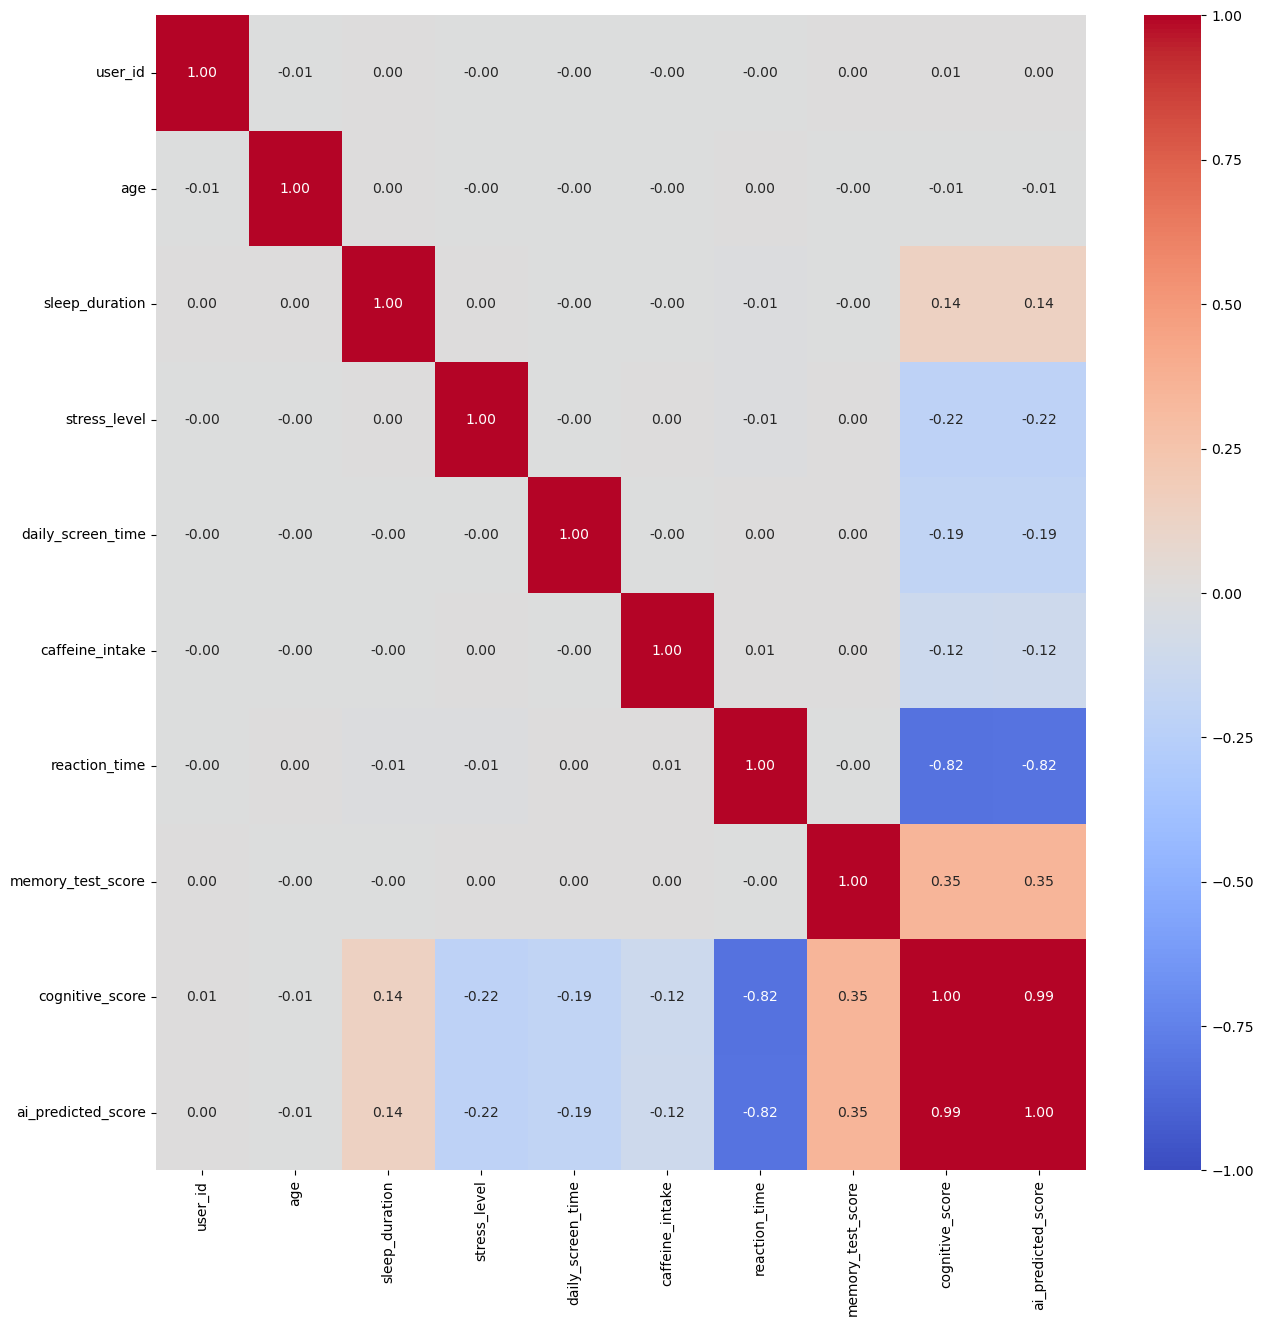

In [104]:
# establecemos el tama√±o de la gr√°fica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlaci√≥n a una gr√°fica
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "coolwarm", # para establecer el color de la gr√°fica
            vmax = 1, # para indicar cual es el valor m√°ximo de nuestra escala de colores
            vmin = -1); # para identificar el valor m√≠nimo de nuestra escala de colores

**Observaciones** **A√ëADIR A MARKDOWN**
Cercano a 1: Correlaci√≥n positiva fuerte (cuando una variable aumenta, la otra tiende a aumentar).
Cercano a -1: Correlaci√≥n negativa fuerte (cuando una variable aumenta, la otra tiende a disminuir).
Cercano a 0: Correlaci√≥n d√©bil o no lineal entre las variables.

Correlaciones Positivas:
- cognitive_score y ai_predicted_score (0.99): Existe una correlaci√≥n positiva extremadamente fuerte entre la puntuaci√≥n cognitiva y la puntuaci√≥n predicha por la IA. Esto sugiere que el modelo de IA es muy bueno prediciendo la puntuaci√≥n cognitiva o que ambas variables est√°n midiendo aspectos muy similares del rendimiento cognitivo.
- memory_test_score y cognitive_score (0.35): Existe una correlaci√≥n positiva moderada, lo que es esperable ya que la memoria es un componente de la cognici√≥n. Una mejor puntuaci√≥n en la prueba de memoria tiende a estar asociada con una puntuaci√≥n cognitiva m√°s alta.
- sleep_duration y cognitive_score (0.14): Hay una correlaci√≥n positiva d√©bil pero presente, indicando que una mayor duraci√≥n del sue√±o tiende a estar ligeramente asociada con una puntuaci√≥n cognitiva m√°s alta.

Correlaciones Negativas:
- reaction_time y memory_test_score (-0.82): Hay una correlaci√≥n negativa fuerte. Un menor tiempo de reacci√≥n (que generalmente indica una mejor agilidad mental) est√° fuertemente asociado con una puntuaci√≥n m√°s alta en la prueba de memoria.
- reaction_time y cognitive_score (-0.82): Similarmente, una correlaci√≥n negativa fuerte entre el tiempo de reacci√≥n y la puntuaci√≥n cognitiva. Un menor tiempo de reacci√≥n se asocia con una puntuaci√≥n cognitiva m√°s alta.
- stress_level y cognitive_score (-0.22): Existe una correlaci√≥n negativa d√©bil, sugiriendo que niveles m√°s altos de estr√©s tienden a estar ligeramente asociados con una puntuaci√≥n cognitiva m√°s baja.
- daily_screen_time y cognitive_score (-0.19): Hay una correlaci√≥n negativa d√©bil, indicando que un mayor tiempo de pantalla diario tiende a estar ligeramente asociado con una puntuaci√≥n cognitiva m√°s baja.
- caffeine_intake y cognitive_score (-0.12): Una correlaci√≥n negativa muy d√©bil, sugiriendo una ligera tendencia a que una mayor ingesta de cafe√≠na se asocie con una puntuaci√≥n cognitiva ligeramente m√°s baja (aunque esta correlaci√≥n es muy peque√±a y podr√≠a no ser significativa en la pr√°ctica).

Correlaciones D√©biles o Nulas (cercanas a 0):
- age tiene correlaciones muy d√©biles con la mayor√≠a de las variables, aunque hay una ligera correlaci√≥n negativa con ai_predicted_score (-0.01).
- sleep_duration tiene correlaciones d√©biles con la mayor√≠a de las variables, aparte de las mencionadas con las puntuaciones cognitivas.
- stress_level tiene correlaciones d√©biles con la mayor√≠a de las variables, aparte de las mencionadas con las puntuaciones cognitivas.
- daily_screen_time y caffeine_intake tambi√©n muestran correlaciones d√©biles en general.

En Resumen:

Las relaciones m√°s notables pueden ser:
La fuerte relaci√≥n positiva entre prueba de memoria y puntuaci√≥n cognitiva.
Una mayor duraci√≥n del sue√±o tiende a estar ligeramente asociada con una puntuaci√≥n cognitiva m√°s alta. La ligera relaci√≥n entre duraci√≥n del sue√±o y puntuaci√≥n cognitiva, a m√°s horas durmiendo la puntuaci√≥n tiende a ser un poco m√°s alta.
La fuerte relaci√≥n negativa entre el tiempo de reacci√≥n y las puntuaciones de memoria y cognitivas (incluida la predicci√≥n de la IA).
Relaciones d√©biles a moderadas entre el sue√±o, el estr√©s, el tiempo de pantalla, la ingesta de cafe√≠na y las puntuaciones de memoria y cognitivas.

### Next steps:
- Explorar las relaciones m√°s fuertes con m√°s detalle: Podr√≠as crear scatter plots entre reaction_time y las puntuaciones cognitivas para visualizar la naturaleza de esta relaci√≥n negativa.

### An√°lisis Categ√≥ricas y Recomendaciones de Gr√°ficos:
1. gender (Categ√≥rica) vs. Variables Num√©ricas (age, sleep_duration, stress_level, etc.):
        ¬øPor qu√© analizar? Puede haber diferencias significativas en los patrones de sue√±o, niveles de estr√©s,
        rendimiento cognitivo, etc., entre los diferentes g√©neros.
   >    Gr√°ficos recomendados:
           -    Boxplots: Son excelentes para comparar la distribuci√≥n de una variable num√©rica entre diferentes categor√≠as. Por ejemplo, un boxplot de sleep_duration por gender mostrar√≠a si hay diferencias en la duraci√≥n del sue√±o entre hombres, mujeres y otros.
           -    Violin Plots: Similares a los boxplots pero proporcionan una estimaci√≥n de la densidad de probabilidad de cada grupo, lo que puede dar una mejor idea de la forma de la distribuci√≥n.
           -    Bar Plots (con intervalos de confianza): Si quieres comparar las medias de una variable num√©rica entre los g√©neros, un bar plot mostrando la media y los intervalos de confianza puede ser √∫til.

2. diet_type (Categ√≥rica) vs. Variables Num√©ricas:
        ¬øPor qu√© analizar? La dieta podr√≠a influir en el sue√±o, los niveles de energ√≠a, la funci√≥n cognitiva y el estr√©s.
   >    Gr√°ficos recomendados:
           -    Boxplots: Para comparar la distribuci√≥n de variables como sleep_duration, stress_level, memory_test_score, cognitive_score entre los diferentes tipos de dieta (Non-Vegetarian, Vegetarian, Vegan).
           -    Violin Plots: Para ver la forma de la distribuci√≥n de estas variables num√©ricas para cada tipo de dieta.
           -    Bar Plots (con intervalos de confianza): Para comparar las medias de estas variables entre los grupos de dieta.

3. exercise_frequency (Categ√≥rica) vs. Variables Num√©ricas:
        ¬øPor qu√© analizar? La frecuencia de ejercicio es un factor importante para la salud f√≠sica y mental, 
        y podr√≠a estar relacionado con el sue√±o, el estr√©s, el tiempo de reacci√≥n y el rendimiento cognitivo.
   >    Gr√°ficos recomendados:
           -    Boxplots: Para comparar la distribuci√≥n de sleep_duration, stress_level, reaction_time, memory_test_score, cognitive_score entre los diferentes niveles de frecuencia de ejercicio (Low, Medium, High).
           -    Violin Plots: Para observar la distribuci√≥n detallada de estas variables num√©ricas por frecuencia de ejercicio.
           -    Bar Plots (con intervalos de confianza): Para comparar las medias de estas variables entre los grupos de frecuencia de ejercicio.


### An√°lisis entre Variables Categ√≥ricas:
¬øPor qu√© analizar? Por ejemplo, podr√≠a haber una distribuci√≥n diferente de tipos de dieta entre los g√©neros o diferentes frecuencias de ejercicio entre los grupos de edad (si hubieras categorizado 'age').
  >    Gr√°ficos recomendados:
   -    Stacked Bar Charts o Grouped Bar Charts: Para comparar las proporciones de una variable categ√≥rica dentro de las categor√≠as de otra. Por ejemplo, la proporci√≥n de cada tipo de dieta para cada g√©nero.
   -    Count Plots (con hue): Puedes usar seaborn.countplot() con el argumento hue para visualizar la distribuci√≥n de una variable categ√≥rica dividida por las categor√≠as de otra.

## 1. Gender vs V. Num√©ricas

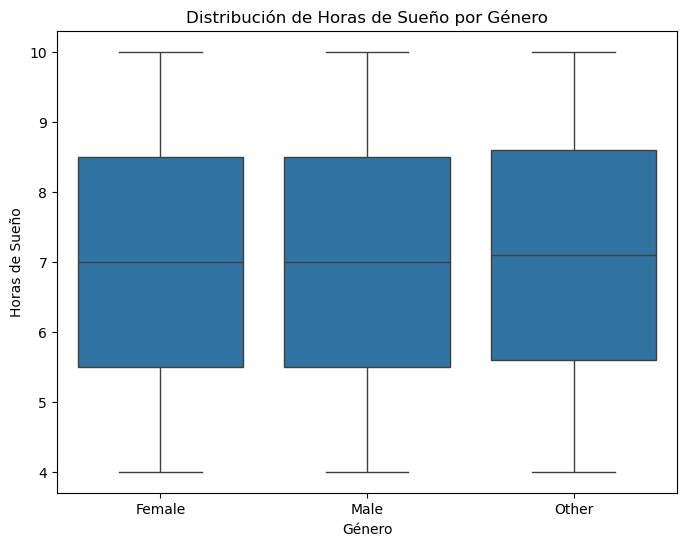

In [105]:
# Boxplot de Sleep Duration por Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='sleep_duration', data=df_analisis)
plt.title('Distribuci√≥n de Horas de Sue√±o por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Horas de Sue√±o')
plt.show()

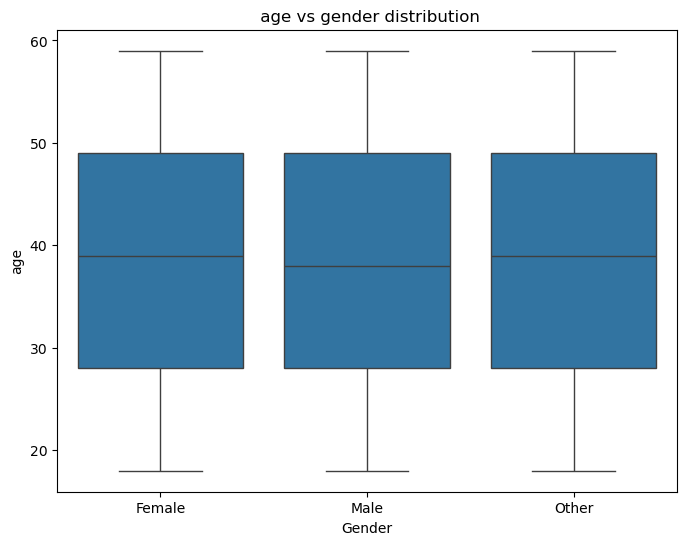

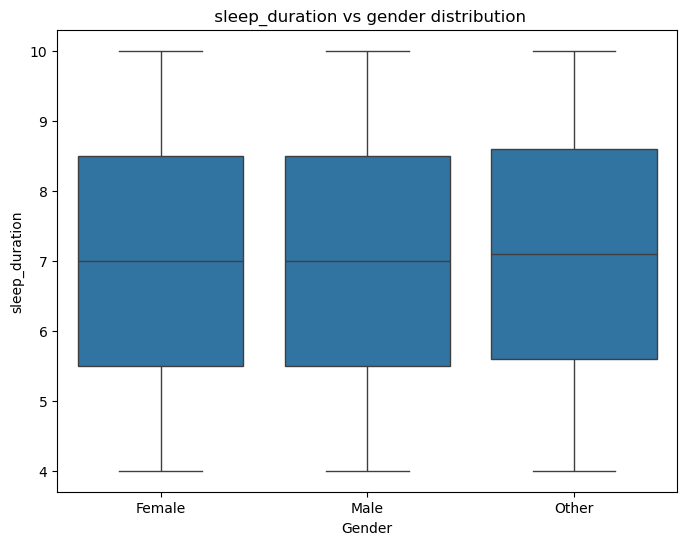

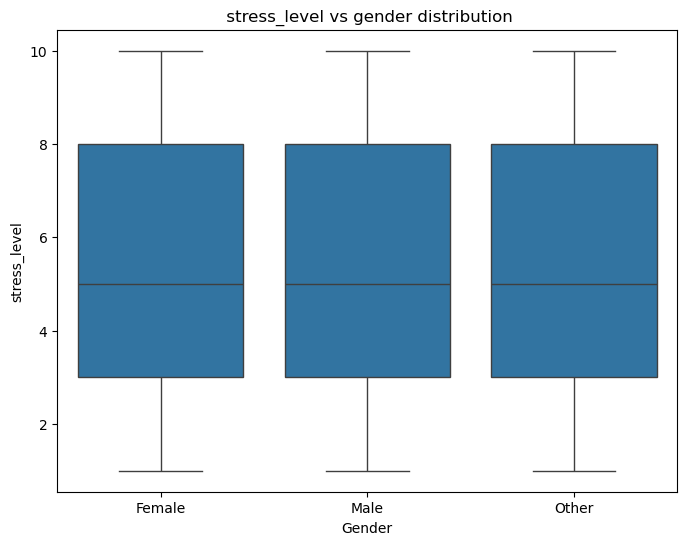

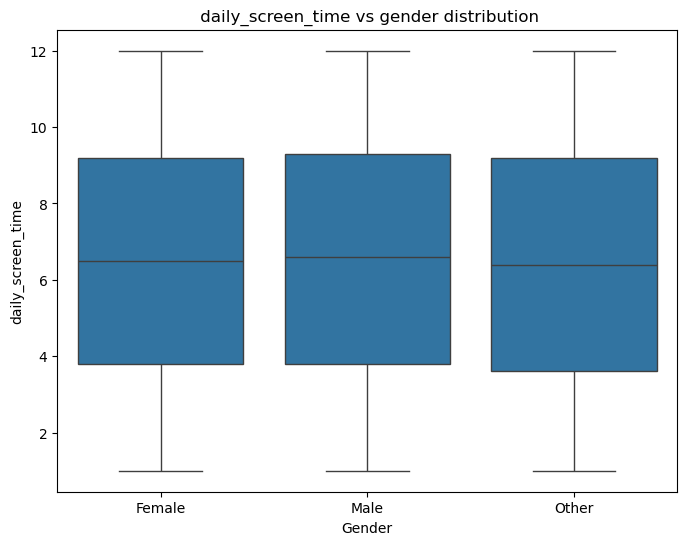

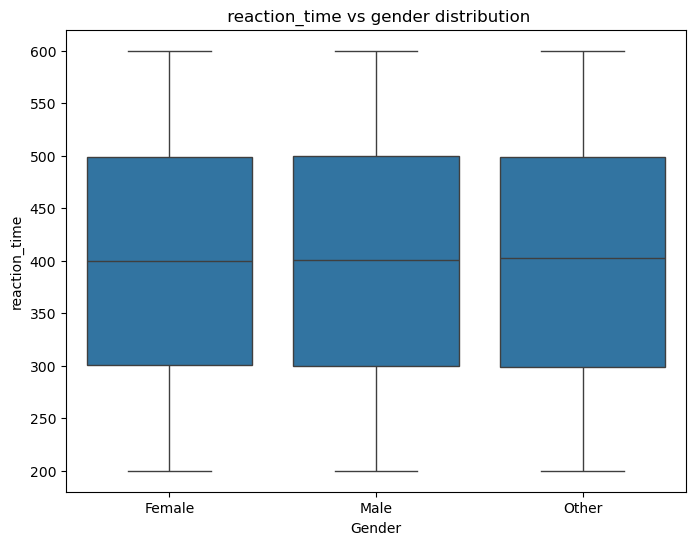

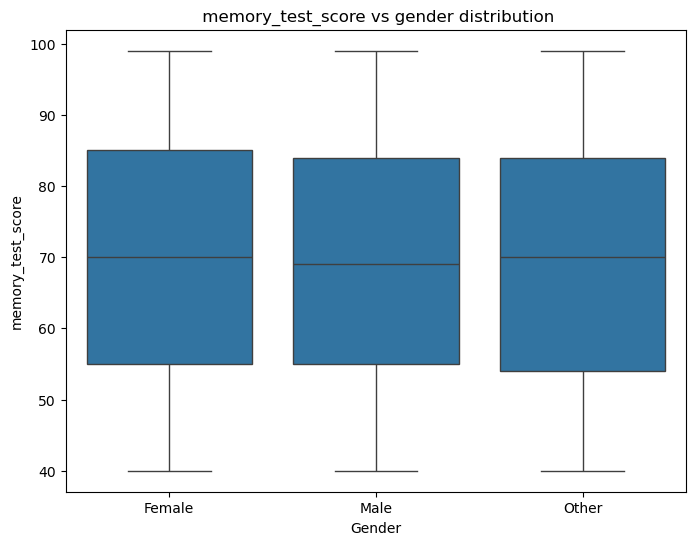

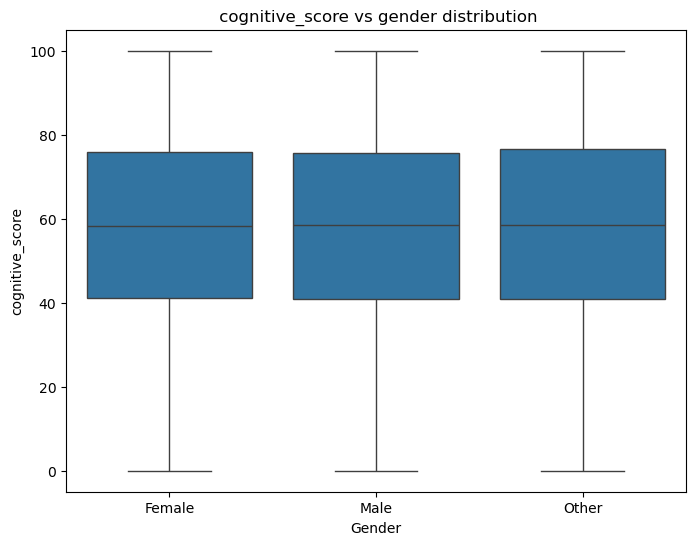

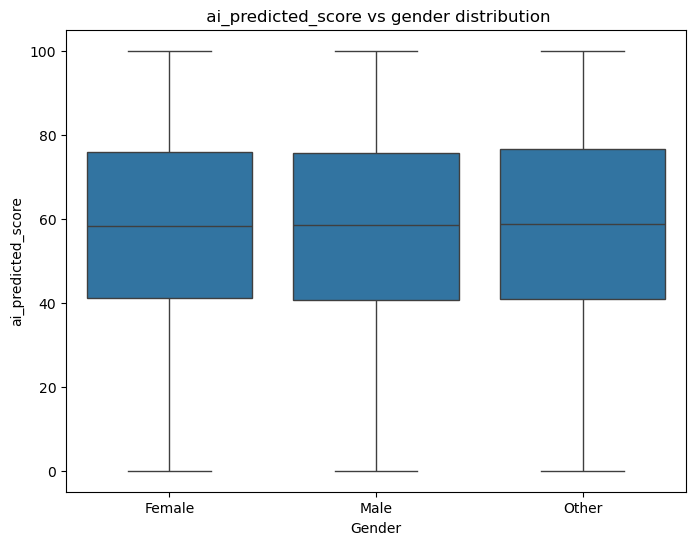

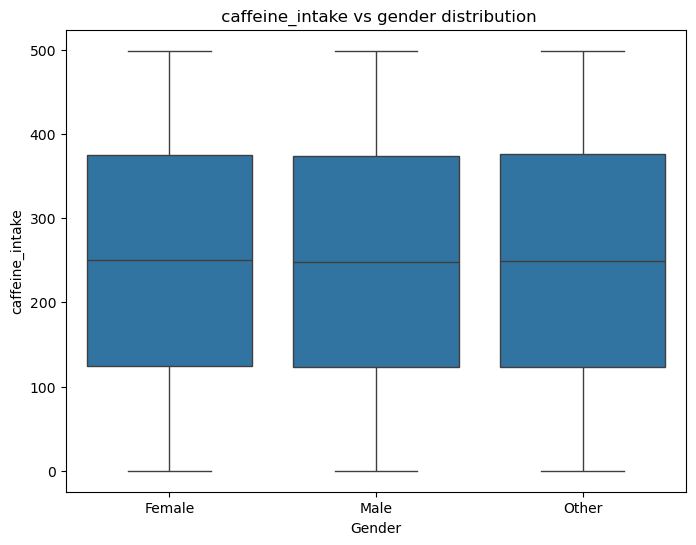

In [106]:
 # Boxplots para comparar distribuciones con g√©nero
numerical_cols = ['age', 'sleep_duration', 'stress_level', 'daily_screen_time',
                          'reaction_time', 'memory_test_score', 'cognitive_score',
                          'ai_predicted_score', 'caffeine_intake']

for col in numerical_cols:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='gender', y=col, data=df_analisis)
            plt.title(f' {col} vs gender distribution')
            plt.xlabel('Gender')
            plt.ylabel(col)
            plt.show()

**No observamos variaciones por g√©nero**

<Axes: xlabel='stress_category', ylabel='count'>

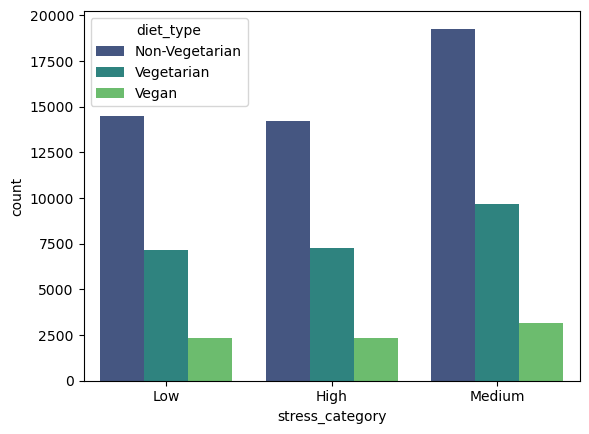

In [107]:
# Gr√°fico de barras para comparar categor√≠as de nivel de estr√©s y tipo de dieta
sns.countplot(x = "stress_category",
              data = df_analisis,
              palette = "viridis", 
              hue = "diet_type")

<Axes: xlabel='gender', ylabel='count'>

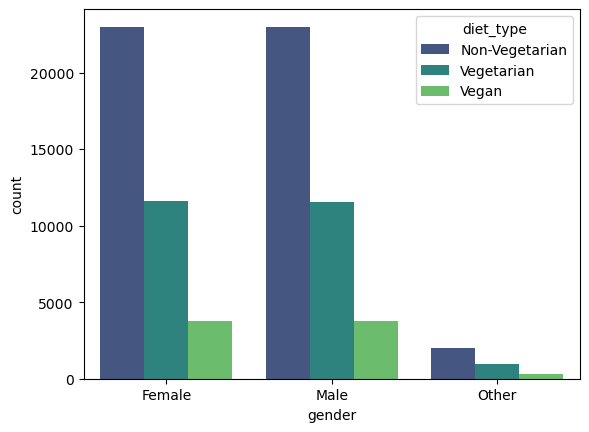

In [108]:
# Gr√°fico de barras para comparar  g√©nero y tipo de dieta
sns.countplot(x = "gender",
              data = df_analisis,
              palette = "viridis", 
              hue = "diet_type")

<Axes: xlabel='diet_type', ylabel='generation'>

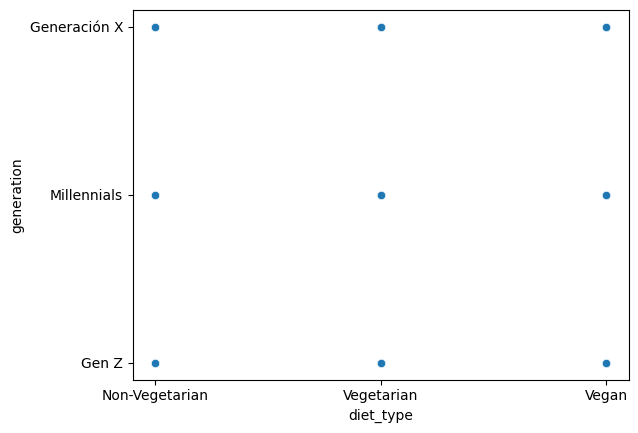

In [109]:
sns.scatterplot(x = "diet_type",
                y = "generation",
                data = df_analisis)

In [110]:
df_analisis.columns

Index(['user_id', 'age', 'gender', 'sleep_duration', 'stress_level',
       'diet_type', 'daily_screen_time', 'exercise_frequency',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score', 'generation',
       'stress_category', 'caffeine_category', 'reaction_time_category',
       'memory_score_category', 'cognitive_category', 'ai_cognitive_category'],
      dtype='object')

Podemos formular algunas hip√≥tesis y pensar en las relaciones esenciales a analizar para llegar a conclusiones interesantes. Aqu√≠ te presento algunas hip√≥tesis y las mejores gr√°ficas para explorarlas:

  **Posibles Hip√≥tesis y Relaciones Esenciales a Analizar:**
  1. Hip√≥tesis sobre el Sue√±o:
        Hip√≥tesis: La duraci√≥n del sue√±o var√≠a significativamente entre diferentes generaciones y se relaciona con el rendimiento cognitivo y la memoria.
        Relaciones a analizar:
            sleep_duration vs. generation
            sleep_duration vs. cognitive_score (por generaci√≥n)
            sleep_duration vs. memory_test_score (por generaci√≥n)
        Gr√°ficas representativas:
            Boxplots o Violin Plots: Para comparar la distribuci√≥n de sleep_duration entre las diferentes generaciones.
            Scatter Plots: Para visualizar la relaci√≥n entre sleep_duration y cognitive_score (o memory_test_score), coloreando los puntos por generaci√≥n para ver si la relaci√≥n var√≠a.
            Line Plots (con intervalos de confianza): Si agrupas por generaci√≥n y calculas la media de cognitive_score (o memory_test_score) para diferentes rangos de sleep_duration, un line plot puede mostrar tendencias.

2. Hip√≥tesis sobre el Estr√©s:

        Hip√≥tesis: Los niveles de estr√©s var√≠an entre las categor√≠as de g√©nero y se relacionan negativamente con el rendimiento cognitivo.
        Relaciones a analizar:
            stress_category vs. gender (ver si hay una distribuci√≥n diferente de niveles de estr√©s entre g√©neros).
            stress_level vs. cognitive_score (separado por g√©nero si es relevante).
        Gr√°ficas representativas:
            Count Plots (con hue): Para visualizar la distribuci√≥n de stress_category para cada gender.
            Stacked Bar Charts: Para mostrar la proporci√≥n de cada stress_category dentro de cada gender.
            Boxplots o Violin Plots: Para comparar la distribuci√≥n de cognitive_score entre las diferentes categor√≠as de stress_category.

3. Hip√≥tesis sobre la Dieta:

        Hip√≥tesis: El tipo de dieta se asocia con diferentes niveles de ingesta de cafe√≠na y puede influir en el rendimiento cognitivo.
        Relaciones a analizar:
            caffeine_category vs. diet_type (ver si hay patrones de consumo de cafe√≠na diferentes seg√∫n la dieta).
            diet_type vs. cognitive_score.
        Gr√°ficas representativas:
            Count Plots (con hue): Para visualizar la distribuci√≥n de caffeine_category para cada diet_type.
            Stacked Bar Charts: Para mostrar la proporci√≥n de cada caffeine_category dentro de cada diet_type.
            Boxplots o Violin Plots: Para comparar la distribuci√≥n de cognitive_score entre los diferentes tipos de diet_type.

4. Hip√≥tesis sobre el Tiempo de Pantalla y el Ejercicio:

        Hip√≥tesis: Un mayor tiempo de pantalla diario se asocia con niveles de estr√©s m√°s altos y menor duraci√≥n del sue√±o, mientras que una mayor frecuencia de ejercicio se asocia con menor estr√©s y mejor rendimiento cognitivo.
        Relaciones a analizar:
            daily_screen_time vs. stress_category
            daily_screen_time vs. sleep_duration
            exercise_frequency vs. stress_category
            exercise_frequency vs. cognitive_score
        Gr√°ficas representativas:
            Boxplots o Violin Plots: Para comparar la distribuci√≥n de stress_level o sleep_duration entre diferentes rangos de daily_screen_time (podr√≠as categorizar daily_screen_time si es necesario).
            Boxplots o Violin Plots: Para comparar la distribuci√≥n de stress_level o cognitive_score entre las diferentes categor√≠as de exercise_frequency.

5. Hip√≥tesis sobre la Predicci√≥n de la IA:

        Hip√≥tesis: La puntuaci√≥n predicha por la IA (ai_predicted_score) est√° fuertemente correlacionada con la puntuaci√≥n cognitiva real (cognitive_score) y podr√≠a mostrar patrones similares en relaci√≥n con otras variables.
        Relaciones a analizar:
            ai_predicted_score vs. cognitive_score (ya lo viste en la correlaci√≥n).
            ai_predicted_score vs. otras variables (para ver si sigue tendencias similares a cognitive_score).  
        Gr√°ficas representativas:
            Scatter Plot: Para visualizar la relaci√≥n entre ai_predicted_score y cognitive_score.
            Comparaci√≥n de Boxplots/Violin Plots: Superponer (si es posible y claro) las distribuciones de cognitive_score y ai_predicted_score para diferentes categor√≠as de otras variables (ej., generation, stress_category).

*Multivariedad: Recuerda que las relaciones entre variables pueden ser complejas y estar influenciadas por otras variables. Considera la posibilidad de realizar an√°lisis multivariados m√°s adelante si encuentras relaciones interesantes a nivel bivariado.*

In [111]:
df_analisis.to_csv("test.csv")

In [ ]:
df_analisis.to_excel('test.xlsx', index=True)